## LaGuardia CC Capstone Project 2 - Diabetes
   
### In this project, I will be analyzing the diabetes data, more specifically, among African Americans and Hispanics. According to the American Diabetes Association, Hispanic and African American groups are the second and third places with the highest rates of diagnosed diabetes in the county, with 12.1% and 11.7% within their populations, respectively. 


###  For this project, I will be answering the following questions:




***1) What was the level of glucose when they were tested?***

***2) What percentage of the patients tested have high glucose levels?***

***3) Which are the top five age groups with the highest glucose levels among these two groups?***

In [2]:
# Let's sport the necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/\
master/Python/dataset_diabetes/diabetic_data.csv')
diabetes.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


- It can be observed interrogation signs in some of the columns. Let's check the columns with question mark row.


In [4]:
#Checking the columns with question mark rows.
columns_with_question_marks = diabetes.columns[diabetes.isin(['?']).any()].tolist()
print(columns_with_question_marks)

['race', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']


- For all the columns having question mark rows, I am only using the race column for the purpose of my analysis. 
- Let's check the percentage of rows with questions marks within the race column.

In [5]:
race_column_with_question_mark = diabetes[diabetes.race=='?']
print(round((len(race_column_with_question_mark) / diabetes.shape[0]),4) * 100,"%")

2.23 %


- These rows only represent 2.23 percent of the dataset which it is not significant. I will filter these rows later on.
- Let's check how many rows and columns the dataset has.

In [6]:
print(f'Number of Rows: {diabetes.shape[0]} \nNumber of Columns:{diabetes.shape[1]}')

Number of Rows: 101766 
Number of Columns:50


- Now let's check some information about the dataset.

In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

- The dataset consists of 13 integers and 37 object data types.
- The dataset does not seen to have any missing values. Let's check if the there are any missing values.

#### Object values have more memory usage than categorical value. The dataframe has a memory usage of 38.8+ mb. Let's convert the object values into categorical.

In [8]:
for c in diabetes.columns:
    diabetes[c] = diabetes[c].astype('category')

In [9]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   encounter_id              101766 non-null  category
 1   patient_nbr               101766 non-null  category
 2   race                      101766 non-null  category
 3   gender                    101766 non-null  category
 4   age                       101766 non-null  category
 5   weight                    101766 non-null  category
 6   admission_type_id         101766 non-null  category
 7   discharge_disposition_id  101766 non-null  category
 8   admission_source_id       101766 non-null  category
 9   time_in_hospital          101766 non-null  category
 10  payer_code                101766 non-null  category
 11  medical_specialty         101766 non-null  category
 12  num_lab_procedures        101766 non-null  category
 13  num_procedures            101

- The dataframe memory usage has been reduce from 38 + mb to 13.2 mb.
- Let's confirm that there are not missing value in the data.

In [10]:
diabetes.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

- The dataset has not missing values. 

### Let's check the statistical summary of the datase with the describe() method.

In [11]:
diabetes.describe().T

,count,unique,top,freq
encounter_id,101766,101766,12522,1
patient_nbr,101766,71518,88785891,40
race,101766,6,Caucasian,76099
gender,101766,3,Female,54708
age,101766,10,[70-80),26068
weight,101766,10,?,98569
admission_type_id,101766,8,1,53990
discharge_disposition_id,101766,26,1,60234
admission_source_id,101766,17,7,57494
time_in_hospital,101766,14,3,17756


- The average of inpatient visits was ~6 visits. It also has minimun of 0 visits and a maximun of 21 visits. 

- The average of outpatient visits was ~4 visits and the maximun of 42. 

- Now, let's check now the statiscal summary of the categorical or object values.

In [12]:
diabetes.describe(include='category').T

,count,unique,top,freq
encounter_id,101766,101766,12522,1
patient_nbr,101766,71518,88785891,40
race,101766,6,Caucasian,76099
gender,101766,3,Female,54708
age,101766,10,[70-80),26068
weight,101766,10,?,98569
admission_type_id,101766,8,1,53990
discharge_disposition_id,101766,26,1,60234
admission_source_id,101766,17,7,57494
time_in_hospital,101766,14,3,17756


- The Glucose Serum most frequent result was None with 96,420. None means that the test was not taken.
- Diabetes medications was prescribed most of the time with 78,363.
- Medication was not changed most of the with with 54,755.

## Exploratory Data (EDA)

####  Now, let's check the distribution of the three numeric variables of interest: Number of Inpatient visits and Number of Outpatient visits. 

### Checking Distribution for the Number of Inpatient Visits

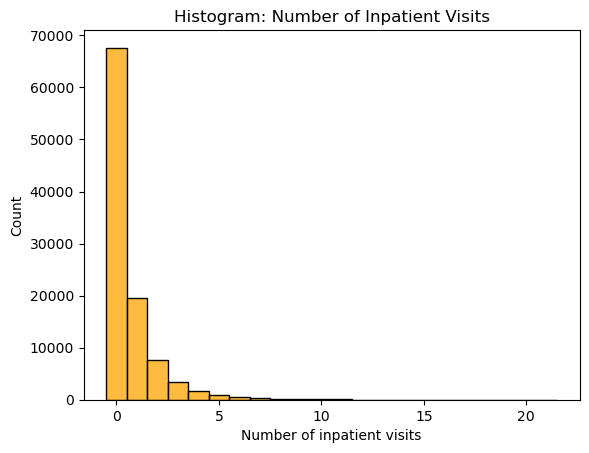

In [13]:
# Number
fig, ax = plt.subplots()
ax = sns.histplot(data=diabetes, x='number_inpatient', color='orange', binwidth=5, bins=5)
ax.set_title('Histogram: Number of Inpatient Visits')  # Setting a title for the graph
ax.set_xlabel('Number of inpatient visits') # Naming the x label
for bar in ax.patches:
    bar.set_width(1)
#ax.bar_label(ax.containers[0])
plt.show()



- Most of data is between 0 and 2. It heavely skewed to the right.

### Checking Distribution for the Number of Outpatient Visits

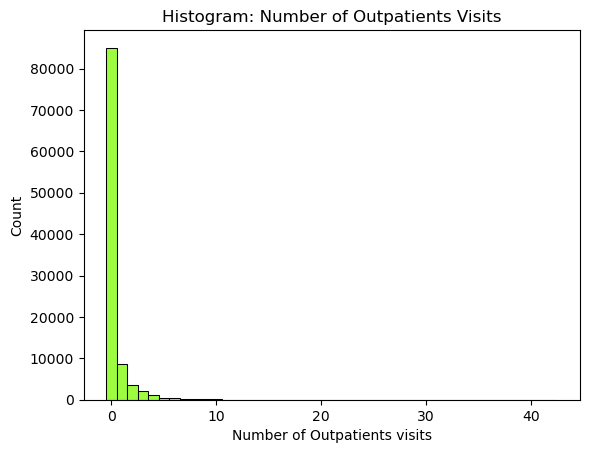

In [14]:

fig, ax = plt.subplots()
ax = sns.histplot(diabetes.number_outpatient, bins=20, binwidth=4, color='lawngreen')
#for bar in ax.patches:
 #   bar.set_width()
plt.title('Histogram: Number of Outpatients Visits')  # Setting a title for the graph
plt.xlabel('Number of Outpatients visits') # Naming the x label
plt.show()

- The distribution falls between 0 and 2. The data skewed to the right.

## Creating Graph of Glucose Result
#### The Glucose Serum Test indicates that amount of glucose in the blood. Let's check the frequency of each result.

In [15]:
#Let's first create a table with a groupby. However, we need to filter where test were not taken
test_taken = diabetes[diabetes['max_glu_serum'] != "None"].reset_index() # To filter the None values 
wanted_values = ['>300', 'Norm', '>200']  # To include the wanted value
test_taken = test_taken[test_taken['max_glu_serum'].isin(wanted_values)] # Encounters where test were done
test_taken['max_glu_serum'] = test_taken['max_glu_serum'].cat.remove_categories(['None']) #Removing None values
test_taken.max_glu_serum.unique()

['>300', 'Norm', '>200']
Categories (3, object): ['>200', '>300', 'Norm']

In [16]:
test_taken.head()

,index,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,133,2265486,44279478,Caucasian,Male,[70-80),?,6,1,1,...,No,No,No,No,No,No,No,Ch,Yes,NO
1,135,2292606,53848278,AfricanAmerican,Female,[70-80),?,6,1,7,...,No,No,No,No,No,No,No,No,Yes,>30
2,142,2309268,77475465,Caucasian,Female,[80-90),?,6,1,7,...,No,Steady,No,No,No,No,No,No,Yes,>30
3,144,2311404,95586993,Caucasian,Female,[90-100),?,6,3,7,...,No,No,No,No,No,No,No,No,No,NO
4,153,2430276,69318126,Caucasian,Male,[70-80),?,6,1,7,...,No,No,No,No,No,No,No,No,No,NO


In [17]:
glucose_results = test_taken.groupby('max_glu_serum')['encounter_id'].count().sort_values(ascending=False)
percentage = (glucose_results / sum(glucose_results)) * 100
frequency = glucose_results
glucose_results = pd.DataFrame({'frequency' : frequency, 'percentage' : percentage}) 
glucose_results = glucose_results.reset_index()
glucose_results.columns = ['results_type', 'frequency', 'percentage']
glucose_results = glucose_results.sort_values(by='frequency',ascending=False)
glucose_results.head()

,results_type,frequency,percentage
0,Norm,2597,48.578376
1,>200,1485,27.777778
2,>300,1264,23.643846


- When glucose tests were taken, most patients had a normal glucose levels with 2,597. Other where glucose level where high, 1,485 patients with a glucose level of  >200 and 1,264 patients with a glucose level of >300.

- Let's create a graph showing these results.

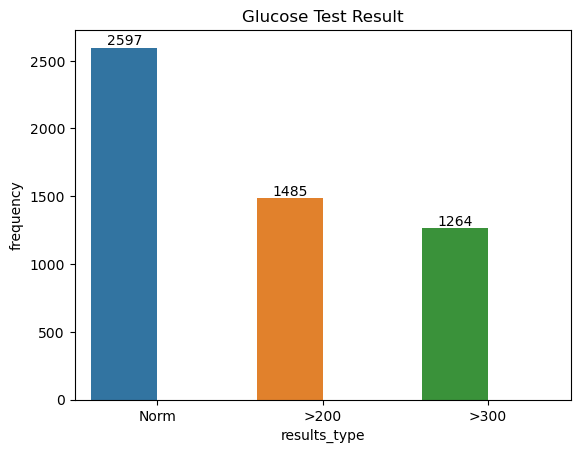

In [18]:
fig, ax = plt.subplots()
bar_order = ['Norm', '>200', '>300']
ax = sns.barplot(data=glucose_results, x='results_type', y='frequency', dodge=False, order=bar_order)  # Adjust width as needed
for bar in ax.patches: # To assing the width of the barss
    bar.set_width(0.4) 
ax.bar_label(ax.containers[0]) # Setting the numbers to each bar
plt.title('Glucose Test Result')
plt.show();


## Checking When Diabetic Medication was Prescribed

#### For this graph, we are going to check the amount of times that a diabetic medication was prescribe. This time, I am going filter the data with only glucose test were taken. I am using the countplot() seaborn method.

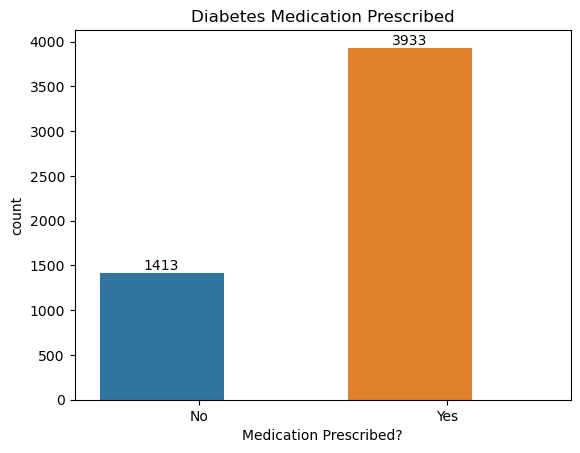

In [49]:
ax = sns.countplot(x='diabetesMed', data=test_taken, dodge=False)
for bar in ax.patches:
    bar.set_width(0.5)
ax.bar_label(ax.containers[0])
plt.title("Diabetes Medication Prescribed")
plt.xlabel('Medication Prescribed?')
plt.xticks(size=10)
plt.show();

- Most tested patients were prescribed diabetes medication with 3,933 agaisnt 1,413 patient that were not prescribed any medication. 
- It should be checked if they have been prescribed medication previous to the encounter. 

## Checking Diabetic Medication Changed

### Let's do a graph to see how many times was medication change.

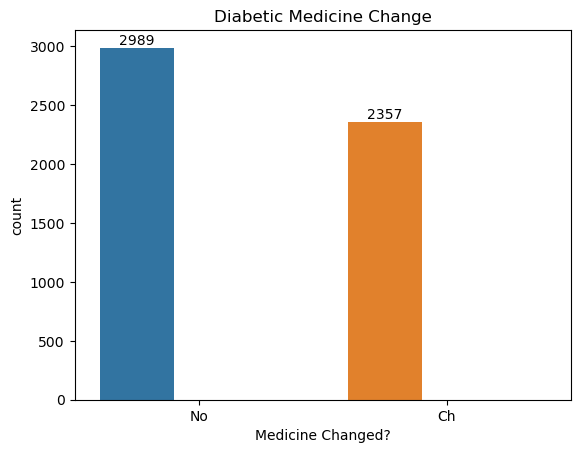

In [20]:
fig, ax = plt.subplots()
col_order = ['No', 'Ch']
ax = sns.countplot(data=test_taken, x='change', dodge=False, order=col_order)
for bar in ax.patches:
    bar.set_width(0.3)
ax.bar_label(ax.containers[0])
plt.title("Diabetic Medicine Change")
plt.xlabel('Medicine Changed?')
plt.show();

- The patient medication was not changed most of the time with 2989 and 2,357 that it was actually changed

### Hispanic and African American Patients Glucose Level 

- Now, let's beging our analysis by checking the glucose levels of the two groups.
- Before, I am creating a dataset that only shows the two groups and they have taken the glucose test during the encounter.

In [21]:
#First let's filter out the none rows from Glucose Test (None means that the patient was not given test)
dfn = diabetes[diabetes.max_glu_serum != 'None'].reset_index()
#Droping the None values completely from the column
dfn.max_glu_serum = dfn.max_glu_serum.cat.remove_categories(['None'])
# Now let's create a dataset only African Americans and Hispanics
lat_af = dfn[(dfn.race == 'Hispanic') | (dfn.race == 'AfricanAmerican')]
lat_af.head()

,index,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,135,2292606,53848278,AfricanAmerican,Female,[70-80),?,6,1,7,...,No,No,No,No,No,No,No,No,Yes,>30
9,223,2791716,105589584,Hispanic,Female,[70-80),?,6,1,1,...,No,No,No,No,No,No,No,No,No,<30
18,390,3686592,68029074,Hispanic,Female,[40-50),?,6,1,7,...,No,No,No,No,No,No,No,No,No,>30
21,456,4066842,70269183,Hispanic,Female,[60-70),?,6,1,7,...,No,Steady,No,No,No,No,No,No,Yes,>30
22,460,4084524,76959585,AfricanAmerican,Female,[70-80),?,6,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30


In [22]:
#Checking if the max_glu_serum column is only showing the levels of Glucose
lat_af.max_glu_serum.unique()

['>300', '>200', 'Norm']
Categories (3, object): ['>200', '>300', 'Norm']

In [23]:
# Checking the shape of the data
print(f'Number of Rows:{lat_af.shape[0]}\nNumber of Columns: {lat_af.shape[1]}')

Number of Rows:644
Number of Columns: 51


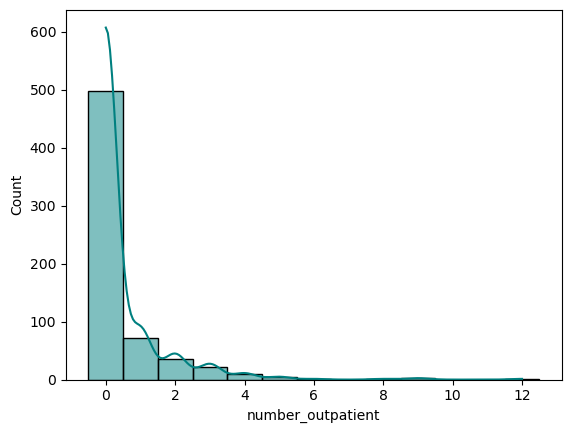

In [24]:
#Let's check the distribution of the number of outpatient visits column
sns.histplot(x='number_outpatient', data=lat_af, color='teal', kde=True)
plt.show();

- The number oupatient visits is showing the same bevahior as the general. 
- Let's check the distribution for the number of inpatient visits.

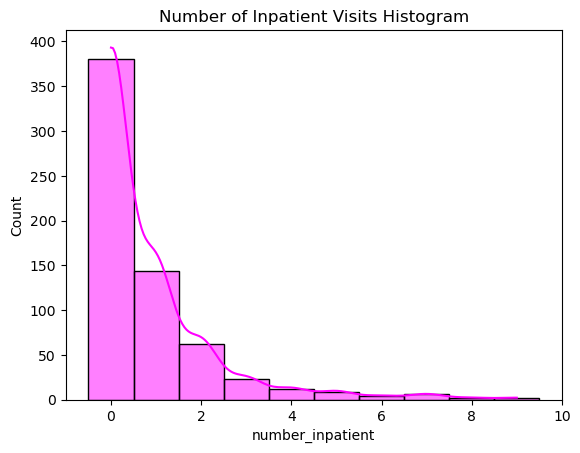

In [25]:
ax = sns.histplot(x=lat_af.number_inpatient, color='fuchsia', kde=True, bins=50, binwidth=1)
plt.title("Number of Inpatient Visits Histogram")
plt.show()

- In the case of the number of inpatient visits, the visits are mostly concentrated between 0 an 1.

## Checking which test result was most frequent

#### The Glucose Serum is  done to check the level of sugar in patient.  The level of sugar is considered high above 200.
#### Let's check which resutls were the most common and their percentage

In [26]:
lat_af_glu = lat_af.groupby(['max_glu_serum'])['encounter_id'].count() #Grouping the data by test result  and counting the amount of patient for each test result
percentage = round((lat_af_glu / lat_af_glu.sum()), 3) * 100 # Looking for the percentage
#Creating a dataframe that includes the count for each test and the percentage
lat_af_glu = pd.DataFrame({'frequency': lat_af_glu, 'percentage': percentage}) 
lat_af_glu = lat_af_glu.reset_index() # Recreating a dataset 
lat_af_glu.columns = ['test_result', 'frequency', 'percentage'] #renaming the column
# Sorting the values by frequency and by percentage. 
lat_af_glu = lat_af_glu.sort_values(by=['frequency', 'percentage'], ascending=False) 
lat_af_glu

,test_result,frequency,percentage
2,Norm,302,46.9
0,>200,174,27.0
1,>300,168,26.1


- At about ~47 percent of the patients have normal sugar levels. However, 27 percent has a sugar level of more than 200 and ~26 percent more than 26 which it is a high percentage.



- Let's create a barplot.

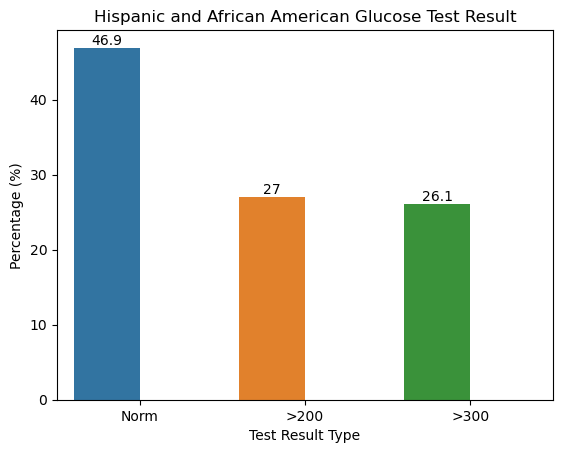

In [27]:
fig, ax = plt.subplots()
bar_lalb_order = ['Norm', '>200', '>300']
ax = sns.barplot(data=lat_af_glu, x='test_result', y='percentage', order=bar_lalb_order)
for b in ax.patches:
    b.set_width(0.4)

ax.bar_label(ax.containers[0])

plt.title('Hispanic and African American Glucose Test Result')
plt.xlabel('Test Result Type')
plt.ylabel('Percentage (%)')
plt.show()

#### Considering the high glucose results among Latinos and African American, I want to compare to other ethnic groups such as Caucasians and Asians. Let's stars with Caucasians.

In [28]:
caucasiandf = dfn[dfn.race == 'Caucasian'] #Using dfn as it has been cleaned of the None values in the glucose text result column
caucasiandf.head()


,index,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,133,2265486,44279478,Caucasian,Male,[70-80),?,6,1,1,...,No,No,No,No,No,No,No,Ch,Yes,NO
2,142,2309268,77475465,Caucasian,Female,[80-90),?,6,1,7,...,No,Steady,No,No,No,No,No,No,Yes,>30
3,144,2311404,95586993,Caucasian,Female,[90-100),?,6,3,7,...,No,No,No,No,No,No,No,No,No,NO
4,153,2430276,69318126,Caucasian,Male,[70-80),?,6,1,7,...,No,No,No,No,No,No,No,No,No,NO
5,162,2521974,80499960,Caucasian,Male,[80-90),?,6,3,7,...,No,No,No,No,No,No,No,No,No,<30


### Let's check the glucose test results among caucasian.


In [29]:
caucasian_glu = caucasiandf.groupby(['max_glu_serum'])['encounter_id'].count()  #Grouping the data by test resul
caucasian_perc = round((caucasian_glu / sum(caucasian_glu)), 3) * 100 # Looking for the percentage
#Creating a dataframe that includes the count for each test and the percentage
caucasian_glu = pd.DataFrame({'frequency' : caucasian_glu, 'percentage(%)' : caucasian_perc})
caucasian_glu = caucasian_glu.reset_index() # Recreating a dataset 
caucasian_glu.columns = ['test_results', 'frequency', 'percentage(%)'] #Renaming th columns
# Sorting the values by percentage in a desecending order. 
caucasian_glu = caucasian_glu.sort_values(by='percentage(%)', ascending=False)
caucasian_glu

,test_results,frequency,percentage(%)
2,Norm,2228,49.0
0,>200,1262,27.7
1,>300,1060,23.3


 - Compared to Hispanics and African Americans, Caucasians have a higher percentage of patients with a normal level of glucose with 49%. Combining the two high glucose level (27.7% + 23.3% =  51%) , the level of high glucose in caucasian is 51% . 

 - Hispanics and African Americans have a higher combined percentage of patients with high glucose levels with 53%.

 - Let's do a barplot showing the results of caucasians test glucose results.

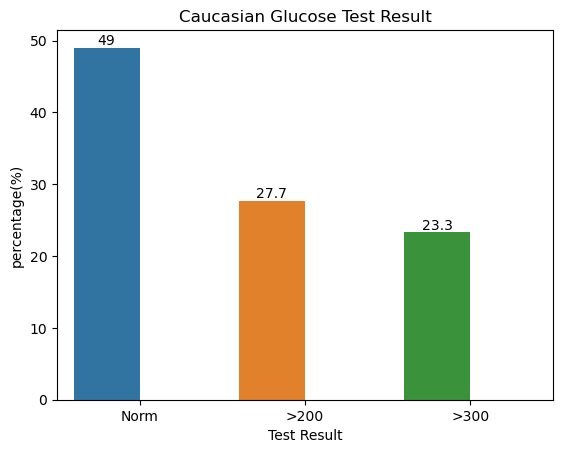

In [30]:
fig, ax = plt.subplots()
labels_order = ['Norm', '>200', '>300']
ax = sns.barplot(x='test_results', y='percentage(%)', data=caucasian_glu, order=labels_order)

for r in ax.patches:
    r.set_width(0.4)
ax.bar_label(ax.containers[0])
plt.title('Caucasian Glucose Test Result')
plt.xlabel('Test Result')
plt.show()

### Now, let's check the level of glucose test result for Asian patients to compare to Hispanics and African Americans patients.

In [31]:
asiandf = dfn[dfn.race == 'Asian'] ## Filtering dfn datasets so it only shows Asian
asiandf.head(10)


,index,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
19,414,3783912,100533195,Asian,Male,[70-80),?,6,1,7,...,No,No,No,No,No,No,No,No,No,>30
113,3187,20080338,83096829,Asian,Male,[50-60),?,6,1,7,...,No,No,No,No,No,No,No,No,No,NO
416,5384,28175706,91163880,Asian,Female,[60-70),?,6,1,7,...,No,Steady,No,No,No,No,No,No,Yes,>30
1457,15405,59172450,25873722,Asian,Female,[80-90),?,5,6,17,...,No,Up,No,No,No,No,No,Ch,Yes,NO
1481,15577,59649234,83158605,Asian,Male,[60-70),?,6,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
1726,17559,64519608,27121446,Asian,Female,[70-80),?,5,6,17,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
2515,23329,79689762,23930586,Asian,Male,[70-80),?,6,25,17,...,No,No,No,No,No,No,No,No,Yes,NO
2782,25242,84575760,23977026,Asian,Male,[60-70),?,5,6,17,...,No,Down,No,No,No,No,No,Ch,Yes,NO
2915,26276,86748714,25376841,Asian,Female,[60-70),?,6,2,7,...,No,No,No,No,No,No,No,No,No,<30
2999,26825,88170486,86593959,Asian,Female,[50-60),?,6,1,7,...,No,No,No,No,No,No,No,No,No,NO


In [32]:
asian_glu = asiandf.groupby(['max_glu_serum'])['encounter_id'].count()
asian_perc = round((asian_glu / sum(asian_glu)), 3) * 100
asian_glu = pd.DataFrame({'frequency' : asian_glu, 'percentage(%)' : asian_perc})
asian_glu = asian_glu.reset_index()
asian_glu.columns = ['test_results', 'frequency', 'percentage(%)']
asian_glu = asian_glu.sort_values(by='percentage(%)', ascending=False)
asian_glu

,test_results,frequency,percentage(%)
2,Norm,10,38.5
1,>300,9,34.6
0,>200,7,26.9


- 38.5 percent of the Asian patients have a normal level of glucose. However, the patients with high levels of glucose are 61 percent patients which is higher than the other ethnic groups.

- One interesting fact about Asian patients is that it has the highest percentage of patients with a glucose level of more than 300 compared to the other groups.

- One thing that should be considered into consideration, it is that only 26 Asian patients were tested. 

####  Let's create three barplot to compare all the groups.

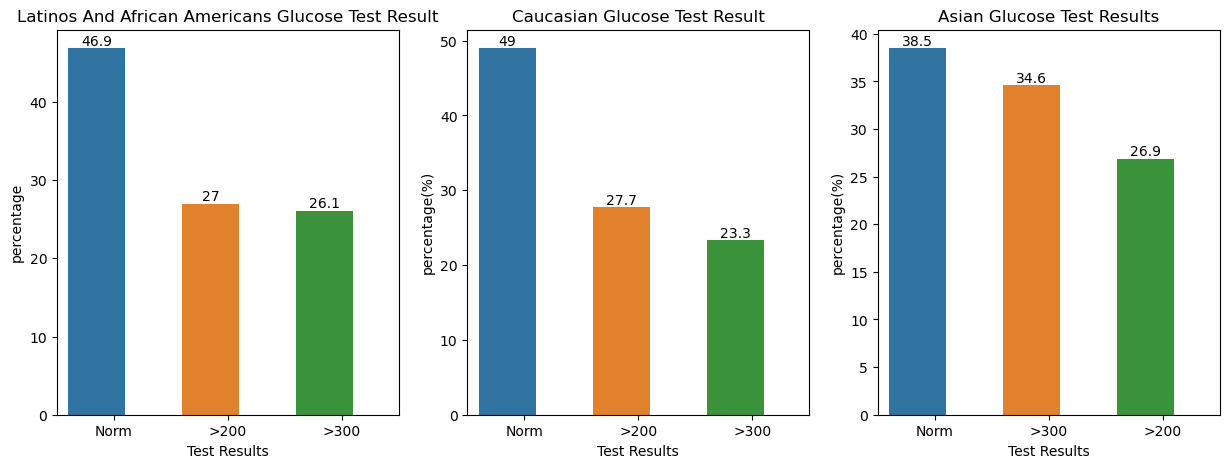

In [33]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
sns.barplot(ax = axs [0],data=lat_af_glu, x='test_result', y='percentage', order=bar_lalb_order)
for r in axs[0].patches:
    r.set_width(0.5)
axs[0].bar_label(axs[0].containers[0])
axs[0].set_title('Latinos And African Americans Glucose Test Result')
axs[0].set_xlabel('Test Results')


sns.barplot(ax = axs[1], x='test_results', y='percentage(%)', data=caucasian_glu, order=labels_order)
for r in axs[1].patches:
    r.set_width(0.5)
axs[1].bar_label(axs[1].containers[0])
axs[1].set_title('Caucasian Glucose Test Result')
axs[1].set_xlabel('Test Results')

lbl_ord = ['Norm', '>300', '>200']
sns.barplot(ax = axs[2], data=asian_glu, x='test_results', y='percentage(%)', order=lbl_ord)
for r in axs[2].patches:
    r.set_width(0.5)
axs[2].bar_label(axs[2].containers[0])
axs[2].set_title('Asian Glucose Test Results')
axs[2].set_xlabel('Test Results')
plt.show()

#### ***Which are the top five age groups with the highest level glucose among these two groups?***

##### Let's examine the age groups with the highest  level of glucose among African Americans and Hispanics patients. But first, let's filter where we only have patients with high glucose level.

In [50]:
dfh1 = dfn[dfn.max_glu_serum != 'Norm'] #Creating a dataset that only shows test results with high glucose level 
dfh1['max_glu_serum'] = dfh1.max_glu_serum.cat.remove_categories(['Norm'])# Totally removing the normal test result

In [35]:
dfh1.max_glu_serum.unique() # Checking to see if the normal glucose level test are totally drop

['>300', '>200']
Categories (2, object): ['>200', '>300']

In [36]:
# Creating another dataset that only shows Hispanics and African Americans patients with high glucose 
lat_af_hig = dfh1[(dfh1['race'] == 'AfricanAmerican')|(dfh1['race'] == 'Hispanic')]
## checking to see if the race is only showing African American and Hispanic patients.
lat_af_hig.race.unique()

['AfricanAmerican', 'Hispanic']
Categories (6, object): ['?', 'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other']

#### Let's calculate the five tops each groups with the highest glucose level. First, I am taking a look to patients with a glucose level of 200 or more.

In [37]:
#Let's calculate the five tops each groups with the highest glucose level. First, I am taking 
lat_af_age_200 = lat_af_hig[lat_af_hig.max_glu_serum == '>200'].groupby(['age'])['encounter_id'].count()
lat_af_age_200 = lat_af_age_200.reset_index()
lat_af_age_200.columns = ['age_group', 'amount']
lat_af_age_200 = lat_af_age_200.sort_values(by='amount', ascending=False).head(5)
lat_af_age_200


,age_group,amount
6,[60-70),50
4,[40-50),34
7,[70-80),31
5,[50-60),28
8,[80-90),19


- The age group with the highest glucose levels over 200 is the 60-70 age group with 50 patients followed by the 40-50 and 70-80 with 34 and 31 respectively.


- Now, let's check the patients with a glucose level of more than 300.

In [38]:
lat_af_age_300 = lat_af_hig[lat_af_hig.max_glu_serum == '>300'].groupby(['age'])['encounter_id'].count()
lat_af_age_300 = lat_af_age_300.reset_index()
lat_af_age_300.columns = ['age_group', 'amount']
lat_af_age_300 = lat_af_age_300.sort_values(by='amount', ascending=False).head(5)
lat_af_age_300

,age_group,amount
4,[40-50),48
6,[60-70),29
5,[50-60),25
7,[70-80),25
3,[30-40),18


- In the case of glucose levels over 300, the 40-50 age group is the highest with 48 patients followed by the 60-70 and 50-60 age groups with 29 and 25 patients.

- It should be observed that the 40-50 age group is among in the top three of both groups. 


#### Let's create a barplot to compare both groups.

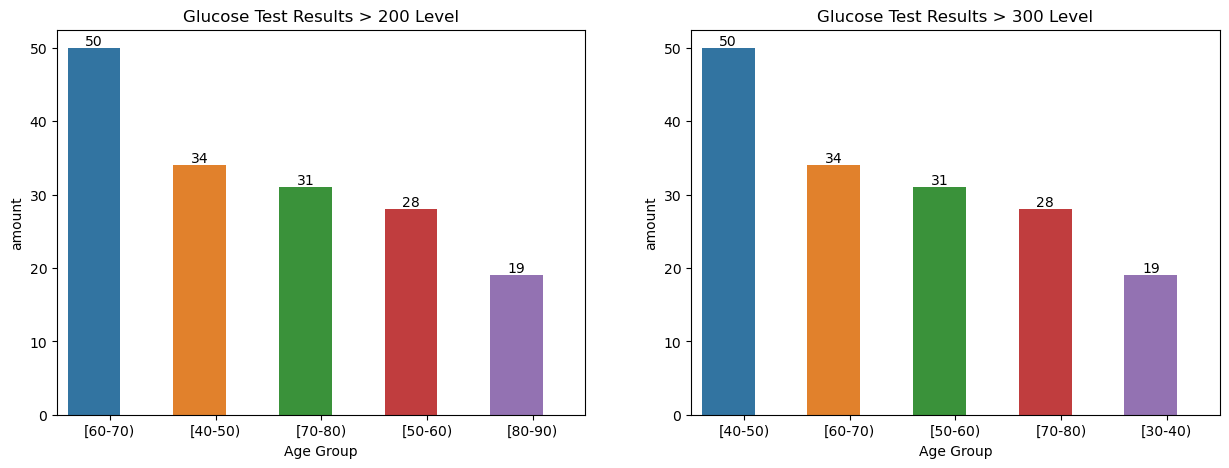

In [39]:
fig, axs = plt.subplots(figsize=(15,5), ncols=2)
age_label = ['[60-70)', '[40-50)', '[70-80)', '[50-60)', '[80-90)']
sns.barplot(ax = axs[0], data=lat_af_age_200, x=age_label, y='amount')
for b in axs[0].patches:
    b.set_width(0.5)
axs[0].bar_label(axs[0].containers[0])
axs[0].set_title("Glucose Test Results > 200 Level")
axs[0].set_xlabel('Age Group')


age_label2 = ['[40-50)', '[60-70)', '[50-60)', '[70-80)', '[30-40)']
sns.barplot(ax = axs[1], data=lat_af_age_200, x=age_label2, y='amount')
for b in axs[1].patches:
    b.set_width(0.5)
axs[1].bar_label(axs[1].containers[0])
axs[1].set_title("Glucose Test Results > 300 Level")
axs[1].set_xlabel('Age Group')

plt.show()

## Conclusion

-  About ~47 percent of the patients have normal sugar levels. However, 27 percent has a sugar level of more than 200 and ~26 percent more than 26, which is a high percentage. 



-   Compared to Hispanics and African Americans, Caucasians have a higher percentage of patients with a normal level of glucose at 49%. Combining the two high glucose levels (27.7% + 23.3% = 51%), the level of high glucose in Caucasians is 51% in comparison to Hispanics and African Americans at 53%.



-  38.5 percent of the Asian patients have a normal level of glucose. However, the patients with high levels of glucose are 61 percent patients which is higher than the other ethnic groups.


- The age group with the highest glucose levels over 200 is the 60-70 age group with 50 patients followed by the 40-50 and 70-80 with 34 and 31 respectively.


- In the case of glucose levels over 300, the 40-50 age group is the highest with 48 patients followed by the 60-70 and 50-60 age groups with 29 and 25 patients.



- One thing that should be considered into consideration, it is that only 26 Asian patients were tested. 